# Comparing subsolvers for NLS solvers

In [2]:
using JSOSolvers

In [3]:
using ADNLPModels
using OptimizationProblems
using OptimizationProblems.ADNLPProblems
df = OptimizationProblems.meta
names = df[(df.objtype .== :least_squares) .& (df.contype .== :unconstrained), :name]
ad_problems = (eval(Meta.parse(problem))(use_nls = true) for problem ∈ names)


Base.Generator{Vector{String}, var"#11#12"}(var"#11#12"(), ["arglina", "arglinb", "bdqrtic", "beale", "brownbs", "brownden", "brybnd", "dixon3dq", "errinros_mod", "freuroth"  …  "palmer4c", "palmer5c", "palmer5d", "palmer6c", "palmer7c", "palmer8c", "power", "sbrybnd", "spmsrtls", "tquartic"])

In [4]:
nls = first(ad_problems)
typeof(nls)

ADNLPModel{Float64, Vector{Float64}, Vector{Int64}}

In [5]:
JSOSolvers.trunkls_allowed_subsolvers

4-element Vector{UnionAll}:
 Krylov.CglsSolver
 Krylov.CrlsSolver
 Krylov.LsqrSolver
 Krylov.LsmrSolver

In [6]:
JSOSolvers.tronls_allowed_subsolvers

4-element Vector{UnionAll}:
 Krylov.CglsSolver
 Krylov.CrlsSolver
 Krylov.LsqrSolver
 Krylov.LsmrSolver

In [7]:
using Krylov

In [8]:
solvers = Dict(
  :trunk_cgls => model -> trunk(model, subsolver_type = CglsSolver),
  :trunk_crls => model -> trunk(model, subsolver_type = CrlsSolver),
  :trunk_lsqr => model -> trunk(model, subsolver_type = LsqrSolver),
  :trunk_lsmr => model -> trunk(model, subsolver_type = LsmrSolver)
)

Dict{Symbol, Function} with 4 entries:
  :trunk_lsqr => #15
  :trunk_cgls => #13
  :trunk_crls => #14
  :trunk_lsmr => #16

In [9]:
using SolverBenchmark
stats = bmark_solvers(solvers, ad_problems)

┌ Info:            Name    nvar    ncon           status      Time      f(x)      Dual    Primal  
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:127
┌ Info:         arglina     100       0      first_order   1.1e+01   1.0e+02   2.7e-15   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:         arglinb     100       0      first_order   2.8e+00   5.0e+01   9.9e-04   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:         bdqrtic     100       0      first_order   2.9e+00   3.8e+02   1.2e-04   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           beale       2       0      first_order   1.9e+00   2.2e-22   9.3e-11   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:         brownbs       2       0         neg_pred   1.6e+00   1.0e+12   2.0e+06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:        brownden       4       0      first_order   2.5e+00   1.5e+34   2.0e+18   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:          brybnd     100       0      first_order   3.1e+00   2.4e-15   6.5e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:        dixon3dq     100       0         max_time   3.0e+01   1.1e-06   3.4e-05   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        errinros     100       0         neg_pred   2.5e+00   8.1e+01   7.3e+00   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:        freuroth     100       0         neg_pred   2.4e+00   9.9e+04   7.7e+03   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        gaussian       3       0      first_order   1.9e+00   1.1e-08   3.8e-09   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info: jennrichsampson       2       0      first_order   1.9e+00   1.2e+02   1.1e-04   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:          kowosb       4       0         neg_pred   1.8e+00   1.8e-02   1.4e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:          meyer3       3       0      first_order   1.9e+00   1.1e+05   8.9e+02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:          morebv     100       0         max_time   3.0e+01   3.8e-04   5.9e-04   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:        osborne1       5       0         not_desc   2.0e+00   5.0e-02   3.0e-04   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        osborne2      11       0         neg_pred   2.3e+00   3.4e-01   6.0e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:        palmer1c       8       0         max_time   3.0e+01   3.4e+03   5.9e+01   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        palmer1d       7       0      first_order   2.6e+00   3.0e+01   6.5e-01   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:        palmer2c       8       0      first_order   2.7e+00   4.9e+00   4.6e-01   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        palmer3c       8       0      first_order   2.8e+00   3.5e+00   1.3e-01   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:        palmer4c       8       0      first_order   3.3e+00   5.1e+00   1.7e-01   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        palmer5c       6       0      first_order   2.6e+00   2.1e+00   1.6e-13   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:        palmer5d       4       0      first_order   2.4e+00   8.7e+01   7.9e-10   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        palmer6c       8       0         max_time   3.0e+01   1.0e+00   2.6e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:        palmer7c       8       0      first_order   2.6e+00   5.4e+00   6.3e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        palmer8c       8       0         max_time   3.0e+01   3.3e+00   6.2e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           power     100       0      first_order   1.9e+00   7.0e-03   1.4e-01   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:         sbrybnd     100       0         neg_pred   0.0e+00   1.6e+03   5.4e+04   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:        spmsrtls     100       0         neg_pred   0.0e+00   7.2e+01   9.7e+00   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        tquartic     100       0         neg_pred   1.9e+00   7.2e-01   9.0e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:            Name    nvar    ncon           status      Time      f(x)      Dual    Primal  
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:127
┌ Info:         arglina     100       0      first_order   1.2e-01   1.0e+02   3.3e-15   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:         arglinb     100       0      first_order   7.0e-02   5.0e+01   4.0e-03   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:         bdqrtic     100       0      first_order   1.1e+00   3.8e+02   1.2e-04   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           beale       2       0      first_order   2.0e-04   2.2e-22   9.3e-11   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:         brownbs       2       0         neg_pred   5.2e-05   1.0e+12   2.0e+06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        brownden       4       0      first_order   2.7e-03   1.5e+34   2.0e+18   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:          brybnd     100       0      first_order   4.0e-01   2.4e-15   6.5e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:        dixon3dq     100       0         not_desc   1.7e+01   7.6e-08   8.7e-06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        errinros     100       0         neg_pred   1.0e-01   9.1e+01   1.5e+01   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:        freuroth     100       0         neg_pred   1.3e-03   9.9e+04   7.7e+03   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        gaussian       3       0      first_order   8.8e-05   1.1e-08   3.8e-09   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info: jennrichsampson       2       0      first_order   1.1e-04   1.2e+02   1.1e-04   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:          kowosb       4       0         neg_pred   1.1e-04   1.8e-02   1.4e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:          meyer3       3       0      first_order   1.5e-04   1.1e+05   8.9e+02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:          morebv     100       0         ma

┌ Info:        osborne1       5       0         not_desc   1.1e-03   5.0e-02   1.8e-04   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        osborne2      11       0         neg_pred   3.5e-03   3.4e-01   6.0e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        palmer1c       8       0      first_order   1.1e-03   1.8e+02   2.7e+00   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        palmer1d       7       0      first_order   6.8e-04   2.9e+01   3.5e-01   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        palmer2c       8       0      first_order   5.6e-04   4.7e+00   1.8e-01   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        palmer3c       8       0      first

┌ Info:           power     100       0      first_order   7.5e-02   7.0e-03   1.4e-01   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:         sbrybnd     100       0         neg_pred   0.0e+00   1.6e+03   5.4e+04   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        spmsrtls     100       0         neg_pred   0.0e+00   7.2e+01   9.7e+00   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        tquartic     100       0         neg_pred   1.2e-03   7.2e-01   9.0e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:            Name    nvar    ncon           status      Time      f(x)      Dual    Primal  
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:127
┌ Info:         arglina     100       0      first_order   7.7e-02   1.0e+02   2.7e-15   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:         arglinb     100       0      first_order   9.1e-02   5.0e+01   4.0e-03   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:         bdqrtic     100       0      first_order   1.8e+00   3.8e+02   5.4e-05   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           beale       2       0      first_order   1.1e-04   8.3e-17   5.7e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:         brownbs       2       0         neg_pred   1.9e-05   1.0e+12   2.0e+06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:        brownden       4       0         max_time   3.0e+01   2.0e+34   7.8e+25   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:          brybnd     100       0      first_order   3.3e-01   1.2e-14   1.2e-06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:        dixon3dq     100       0         not_desc   2.8e+01   8.9e-07   3.0e-05   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        errinros     100       0         not_desc   5.2e-02   9.4e+01   1.5e+01   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        freuroth     100       0         neg_pred   1.6e-03   9.9e+04   7.7e+03   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        gaussian       3       0      first_order   1.2e-04   1.1e-08   3.8e-09   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info: jennrichsampson       2       0      first_order   8.7e-04   1.2e+02   4.4e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:          kowosb       4       0         ne

┌ Info:          meyer3       3       0         max_time   3.0e+01   7.0e+06   1.0e+06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:          morebv     100       0         max_time   3.0e+01   4.2e-04   6.6e-04   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:        osborne1       5       0         not_desc   2.4e-03   5.0e-02   2.3e-04   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        osborne2      11       0         neg_pred   5.7e-03   3.4e-01   6.0e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:        palmer1c       8       0         max_time   3.0e+01   3.9e+04   1.5e+03   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        palmer1d       7       0      first_order   1.0e-02   2.9e+01   3.5e-01   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        palmer2c       8       0      first_order   5.6e-03   4.8e+00   3.0e-01   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        palmer3c       8       0      first_order   7.0e-03   3.5e+00   1.3e-01   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        palmer4c       8       0      first_order   9.4e-03   5.1e+00   1.6e-01   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        palmer5c       6       0      first

┌ Info:           power     100       0      first_order   1.4e-01   1.9e-03   5.8e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:         sbrybnd     100       0         neg_pred   8.1e-03   1.6e+03   4.8e+04   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        spmsrtls     100       0         neg_pred   0.0e+00   7.2e+01   9.7e+00   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        tquartic     100       0         neg_pred   1.8e-03   7.2e-01   9.0e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:            Name    nvar    ncon           status      Time      f(x)      Dual    Primal  
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:127
┌ Info:         arglina     100       0      first_order   9.4e-02   1.0e+02   2.7e-15   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:         arglinb     100       0      first_order   3.2e-02   5.0e+01   4.9e-03   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:         bdqrtic     100       0      first_order   5.8e-01   3.8e+02   3.2e-04   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           beale       2       0      first_order   1.0e-04   1.6e-22   7.8e-11   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:         brownbs       2       0         neg_pred   5.2e-05   1.0e+12   2.0e+06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        brownden       4       0      first_order   2.5e-03   1.5e+34   2.0e+18   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:          brybnd     100       0      first_order   1.9e-01   1.2e-15   4.6e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:        dixon3dq     100       0         max_time   3.0e+01   9.0e-07   3.0e-05   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        errinros     100       0         neg_pred   1.1e-01   7.9e+01   4.8e+00   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:        freuroth     100       0         neg_pred   1.0e-03   9.9e+04   7.7e+03   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        gaussian       3       0      first_order   3.4e-05   1.1e-08   3.8e-09   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info: jennrichsampson       2       0      first_order   9.1e-05   1.2e+02   9.8e-05   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:          kowosb       4       0         neg_pred   2.8e-05   1.8e-02   1.4e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:          meyer3       3       0      first_order   1.0e-04   1.1e+05   8.9e+02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:          morebv     100       0         ma

┌ Info:        osborne1       5       0         not_desc   8.3e-03   5.0e-02   3.1e-04   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        osborne2      11       0         neg_pred   2.2e-03   3.4e-01   6.0e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:        palmer1c       8       0         max_time   3.0e+01   3.4e+03   5.9e+01   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        palmer1d       7       0         max_time   3.0e+01   2.7e+02   7.7e+00   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:        palmer2c       8       0         max_time   3.0e+01   4.1e+01   2.9e+00   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        palmer3c       8       0         max_time   3.0e+01   3.7e+00   2.8e-01   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:        palmer4c       8       0         max_time   3.0e+01   5.3e+01   3.3e+00   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        palmer5c       6       0      first_order   1.9e-04   2.1e+00   4.9e-14   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        palmer5d       4       0      first_order   1.1e-04   8.7e+01   1.7e-05   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        palmer6c       8       0         max_time   3.0e+01   1.0e+00   2.6e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:        palmer7c       8       0         max_time   3.0e+01   3.5e+01   1.6e+00   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        palmer8c       8       0         max_time   3.0e+01   3.3e+00   6.2e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           power     100       0      first_order   3.4e-02   5.7e-03   8.8e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:         sbrybnd     100       0         neg_pred   0.0e+00   1.6e+03   5.4e+04   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        spmsrtls     100       0         neg_pred   0.0e+00   7.2e+01   9.7e+00   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:        tquartic     100       0         neg_pred   1.8e-03   7.2e-01   9.0e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


Dict{Symbol, DataFrames.DataFrame} with 4 entries:
  :trunk_lsqr => 31×39 DataFrame…
  :trunk_cgls => 31×39 DataFrame…
  :trunk_crls => 31×39 DataFrame…
  :trunk_lsmr => 31×39 DataFrame…

In [10]:
# on crée un DataFrame pour améliorer les résultats 
first_order(df) = df.status .== :first_order
unbounded(df) = df.status .== :unbounded
solved(df) = first_order(df) .| unbounded(df)
costnames = ["time"]
costs = [df -> .!solved(df) .* Inf .+ df.elapsed_time]

1-element Vector{var"#21#22"}:
 #21 (generic function with 1 method)

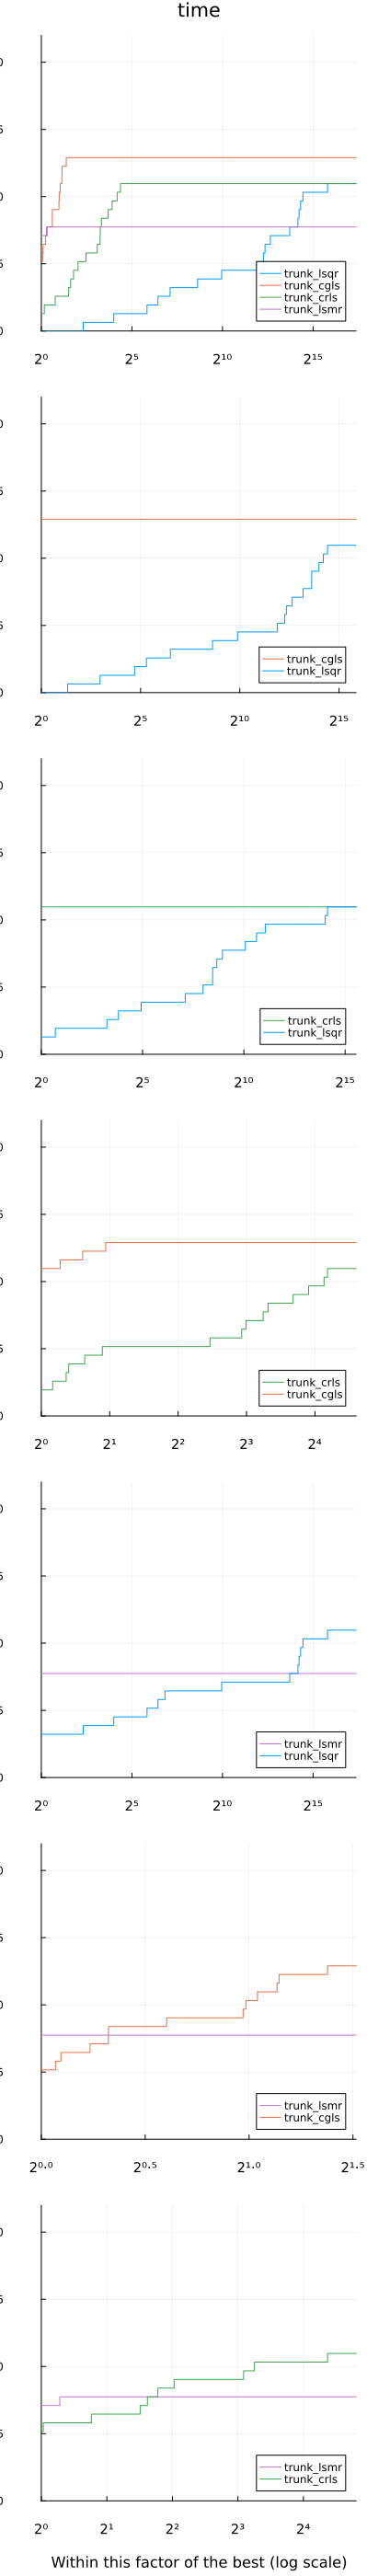

In [11]:
# On trace les résultats
using Plots
gr()
profile_solvers(stats, costs, costnames)